In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
mean_1 = np.array([4, 4])
covar_1 = np.array([[1, 0], [0, 1]])

dist_1 = np.random.multivariate_normal(mean_1, covar_1, 1000)

mean_2 = np.array([8, 8])
covar_2 = np.array([[1, 0], [0, 1]])

dist_2 = np.random.multivariate_normal(mean_2, covar_2, 100)

print(dist_1.shape)

(1000, 2)


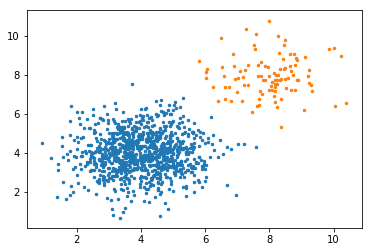

In [56]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], s = 6)
plt.scatter(dist_2[:, 0], dist_2[:, 1], s = 6)

In [15]:
dist_1.shape

(1000, 2)

In [58]:
data = np.zeros([dist_1.shape[0] + dist_2.shape[0], dist_1.shape[1]+1])

In [59]:
data[0:dist_1.shape[0], 1:] = dist_1
data[dist_1.shape[0]:, 1:] = dist_2

data[0:dist_1.shape[0], 0] = 1
data[dist_1.shape[0]:, 0] = 2

In [60]:
def eu_dist(p1, p2):
    
    return np.sqrt(np.sum((p1-p2)**2))


print(eu_dist(np.array([0, 0]), np.array([3, 3])))

4.242640687119285


In [52]:
def eu_dist(p1, p2):
    
    return np.sqrt(np.sum((p1-p2)**2))

def knn(X_train, Y_train, test, k=5):
    
    doori = []
    
    for x, y in zip(X_train, Y_train):
        d = eu_dist(x, test)
        doori.append((d, y))
    
    doori = sorted(doori, key=lambda x: x[0])
    doori = doori[:k]
    
    k_dist = np.array(doori)
    
    items, counts = np.unique(k_dist[:,1], return_counts=True)
    
    print(items, counts)
    
    return items[np.argmax(counts)]
    
    
    
    

In [65]:
X_train = data[:, 1:]
Y_train = data[:, 0]

test = np.array([7, 7])

lab = knn(X_train, Y_train, test, 181)

print(lab)

[1. 2.] [91 90]
1.0


In [30]:
?np.unique